## Load/Clean Data

In [79]:
import pandas as pd

In [80]:
import matplotlib.pyplot as plt

In [81]:
from collections import Counter

In [82]:
import re

In [83]:
import scipy.stats as stats

In [84]:
import researchpy as rp
import seaborn as sns

In [85]:
df = pd.read_csv('Cognitive Science Experiment.csv')

In [86]:
def map_colors(x):
    # map colors to experimental vs. control group
    if x == 'Blå':
        return 'Control'
    return 'Experimental'

def lang_code(x):
    if x == 'Yes':
        return 'DK'
    return 'L2'

df['Group'] = df['Please pick a color'].apply(map_colors)
df['Danish as'] = df['Are you a native speaker of Danish?'].apply(lang_code)
df

,Timestamp,Please pick a color,Please read the text above to the best of your ability. Have you read it?,Please read the text above to the best of your ability. Have you read it?.1,"Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt?",Hvad sætter Michael pris på ved træningen?,Hvad synes Michaels kone om hans træning?,Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman?,Hvor var Michaels første ironman?,Hvor gammel er Michael nu?,...,What is your age?,What is/are your native language(s)? (Can be more than one),Germanic Language - native (not English),"Have you studied/learned any other languages, if yes, please state which?","If so, what other language(s) have you studied/learned?",Germanic Language - L2 (not English),Total # of additional Languages besides DK & ENG,What is your highest level of education?,Group,Danish as
0,5/15/2019 18:26:02,Blå,NaN,I have read,"Hans sønner ville gerne have, at han brugte me...",At den foregår sammen med hans venner.,Hun bryder sig ikke om det,i et år,Sverige,38,...,Under 18,English,No,Yes,Spanish,No,1,Bachelor's Degree or equivalent,Control,DK
1,5/17/2019 11:26:10,Blå,NaN,I have read it.,"Han kunne nemmere holde op med at ryge, når ha...","Ved ikke (kan enten ikke huske det, eller det ...",Hun bryder sig ikke om det.,I et år.,Spanien,48,...,Under 18,"Danish, and Russian",Yes,Yes,"German, English, Latvian, Russian",Yes,4,High school or less,Control,DK
2,5/17/2019 15:06:47,Blå,NaN,I have read it.,Han fik mulighed for at løbe sammen med nogle ...,At den foregår sammen med hans venner.,Hun bryder sig ikke om det.,I et år.,Spanien,48,...,25-34,Danish,Yes,Yes,English and German,Yes,1,Master's Degree +,Control,DK
3,5/17/2019 15:32:02,Blå,NaN,I have read it.,"Han kunne nemmere holde op med at ryge, når ha...",At den foregår sammen med hans venner.,Hun bryder sig ikke om det.,I et år.,Spanien,48,...,25-34,English,No,Yes,"Sanskrit, Latin, Ancient Greek, French",No,4,Bachelor's Degree or equivalent,Control,L2
4,5/18/2019 8:05:29,Blå,NaN,I have read it.,"Han kunne nemmere holde op med at ryge, når ha...",At den foregår sammen med hans venner.,At det er sejt.,I et år.,Spanien,48,...,18-24,Danish,Yes,Yes,"English, German",Yes,1,Bachelor's Degree or equivalent,Control,DK
5,5/18/2019 10:22:48,Blå,NaN,I have read it.,"Han kunne nemmere holde op med at ryge, når ha...",At den foregår sammen med hans venner.,Hun bryder sig ikke om det.,"Ved ikke (kan enten ikke huske det, eller det ...","Ved ikke (kan enten ikke huske det, eller det ...",48,...,18-24,German,Yes,Yes,"English, Latin",No,1,Bachelor's Degree or equivalent,Control,L2
6,5/19/2019 8:44:30,Grøn,I have read it.,NaN,"Hans sønner ville gerne have, at han brugte me...",At den foregår sammen med hans venner.,"Ved ikke (kan enten ikke huske det, eller det ...","Ved ikke (kan enten ikke huske det, eller det ...","Ved ikke (kan enten ikke huske det, eller det ...","Ved ikke (kan enten ikke huske det, eller det ...",...,18-24,Slovak,No,Yes,NaN,No,1,High school or less,Experimental,L2
7,5/19/2019 8:47:51,Grøn,I have read it.,NaN,"Han kunne nemmere holde op med at ryge, når ha...",At den foregår sammen med hans venner.,"Hun var ikke vildt med det i starten, men nu s...",I ti år.,Spanien,48,...,45-54,Danish,Yes,Yes,"English, German, some Swedish, Norwegian, Fren...",Yes,6,Bachelor's Degree or equivalent,Experimental,DK
8,5/19/2019 8:57:27,Blå,NaN,I have read it.,"Han kunne nemmere holde op med at ryge, når ha...",At den foregår sammen med hans venner.,Hun bryder sig ikke om det.,I et år.,Spanien,48,...,25-34,English,No,No,NaN,No,0,Master's Degree +,Control,L2
9,5/19/2019 8:57:38,Grøn,I have read it.,NaN,"Han kunne nemmere holde op med at ryge, når ha...",At den giver ham mere overskud til at være sam...,Hun bryder sig ikke om det.,I et år.,Spanien,48,...,25-34,Danish and English,Yes,Yes,German,Yes,2,Bachelor's Degree or equivalent,Experimental,DK


#### Clean up free-text field responses

In [87]:
def clean_langs(string):
    string = ''.join([x for x in string if re.match(r'[\w\s]', x)])
    if 'Dansk' in string:
        return 'Danish'
    if 'Tysk' in string:
        return 'German'
    return string

In [88]:
# make function to split languages into lists where applicable, then we can get counts of native languages

In [89]:
Counter(df['What is/are your native language(s)? (Can be more than one)'].str.title().str.strip().apply(clean_langs))

Counter(df['If so, what other language(s) have you studied/learned?'].dropna().str.title().str.strip().apply(clean_langs))

set(df['What school did you study in? (e.g. Studieskolen)'].str.title().str.strip())

{'Cbs',
 'Clavis',
 'Hellerup Sprogcenter',
 'Hellerup Sprogskole',
 'I Switched Between Helsingør, Hellerup And Lyngby School, And Were In Each Only For A Short Time.',
 'Ia',
 'Ia Sprog',
 'Ia Sprog, Studieskolen',
 'Københavns Sprogcenter',
 'Leardansk',
 'Næstved Sprogskole',
 'Private Teacher, Stydieskolen, Clavis',
 'Public Language Center',
 'Speak School Of Danish',
 'Sprogcenter Aalborg',
 'Sprogcenter Hellerup',
 'Sprogskole',
 'Sprogskolen',
 'Sprogskolen, Hvidovre Gymnasium',
 'Studieskolen',
 'Studieskolen, Kbh Sprogcenter',
 'Studieskolen, Sprogcenter Hellerup',
 'Studieskolen/ Clavis',
 'University And Studieskolen',
 'Vestegnen Sprog Og Kompetence Center (Vsk)',
 'Vuf',
 nan}

In [90]:
df.columns

Index(['Timestamp', 'Please pick a color',
       'Please read the text above to the best of your ability. Have you read it?',
       'Please read the text above to the best of your ability. Have you read it?.1',
       'Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt?',
       'Hvad sætter Michael pris på ved træningen? ',
       'Hvad synes Michaels kone om hans træning? ',
       'Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman?',
       'Hvor var Michaels første ironman?', 'Hvor gammel er Michael nu?',
       'Hvornår vil Michael stoppe med at løbe?',
       'Hvordan er stemningen i teksten?',
       'Are you a native speaker of Danish?',
       'Have you studied Danish in a language school?',
       'What school did you study in? (e.g. Studieskolen)',
       'What was your last level learned? (e.g. level 3.1, level A2)',
       'Which of these statements best describes your Danish under

In [91]:
set(df['What was your last level learned? (e.g. level 3.1, level A2)'].str.title().str.strip())


{'2.2',
 '2.3',
 '3.3',
 '3.5',
 '3.5 A3 I Think, The One With The Official Exam L',
 '3.6 - Studieprøve, C1',
 '4',
 '5',
 '5.1',
 'A2',
 'B2',
 'B2 (Pd3)',
 'Completed Level 2',
 'Dansk A',
 "Don'T Know, It Was A Basic Intro Course",
 "Don'T Remember, Not High.",
 'Finished The Danish Education (Level 4)',
 'Kan Ikke Huske',
 'Level 5',
 'Modul 5',
 'Modul 6.3 (Level C1)',
 'Module 5 (Passed Pd3)',
 'Pd3',
 'Prøve I Dansk 3',
 'Studieprøven',
 'Studieprøven, Level 6',
 nan}

Make dict of correct answers:

In [92]:
q_a = {
    'Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt?':'Han kunne nemmere holde op med at ryge, når han trænede.',
    'Hvad sætter Michael pris på ved træningen? ': 'At den foregår sammen med hans venner.',
    'Hvad synes Michaels kone om hans træning? ': 'Hun bryder sig ikke om det.',
    'Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman?': 'I et år.',
    'Hvor var Michaels første ironman?' : 'Spanien',
    'Hvor gammel er Michael nu?' : '48',
    'Hvornår vil Michael stoppe med at løbe?' : 'Han vil aldrig stoppe.'
    
}

In [93]:
df_control = df[df['Group'] == 'Control']

In [94]:
df_experiment = df[df['Group'] == 'Experimental']

In [95]:
df_danes = df[df['Are you a native speaker of Danish?'] == 'Yes']
df_L2 = df[df['Are you a native speaker of Danish?'] == 'No']
len(df_danes), len(df_L2)

(59, 45)

In [96]:
df_control_danes = df[(df['Group'] == 'Control') & (df['Are you a native speaker of Danish?'] == 'Yes')]
df_experiment_danes = df[(df['Group'] == 'Experimental') & (df['Are you a native speaker of Danish?'] == 'Yes')]
df_control_L2 = df[(df['Group'] == 'Control') & (df['Are you a native speaker of Danish?'] == 'No')]
df_experiment_L2 = df[(df['Group'] == 'Experimental') & (df['Are you a native speaker of Danish?'] == 'No')]

In [97]:
len(df_control_danes)

26

In [98]:
len(df_control_L2)

23

In [99]:
len(df_experiment_danes)

33

In [100]:
len(df_experiment_L2)

22

In [101]:
df.groupby('Please pick a color').count()

,Timestamp,Please read the text above to the best of your ability. Have you read it?,Please read the text above to the best of your ability. Have you read it?.1,"Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt?",Hvad sætter Michael pris på ved træningen?,Hvad synes Michaels kone om hans træning?,Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman?,Hvor var Michaels første ironman?,Hvor gammel er Michael nu?,Hvornår vil Michael stoppe med at løbe?,...,What is your age?,What is/are your native language(s)? (Can be more than one),Germanic Language - native (not English),"Have you studied/learned any other languages, if yes, please state which?","If so, what other language(s) have you studied/learned?",Germanic Language - L2 (not English),Total # of additional Languages besides DK & ENG,What is your highest level of education?,Group,Danish as
Please pick a color,,,,,,,,,,,,,,,,,,,,,
Blå,49,0,49,49,49,49,49,49,49,49,...,49,49,49,49,47,49,49,49,49,49
Grøn,55,53,0,55,55,55,55,55,55,55,...,55,55,55,55,54,55,55,55,55,55


### Preliminary Demographic Plots

In [102]:
ax = df.groupby(['Group' ])['Please pick a color'].count()

Text(0.5, 1.0, 'Counts of Control vs. Experimental Groups')

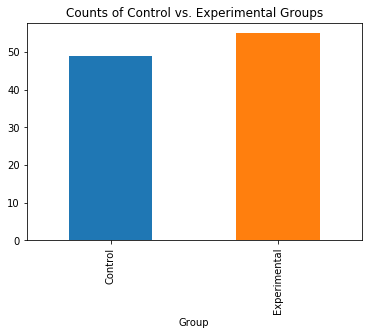

In [103]:
ax.plot.bar(stacked=True)

plt.title('Counts of Control vs. Experimental Groups')

Danish as     DK  L2
Group               
Control       26  23
Experimental  33  22


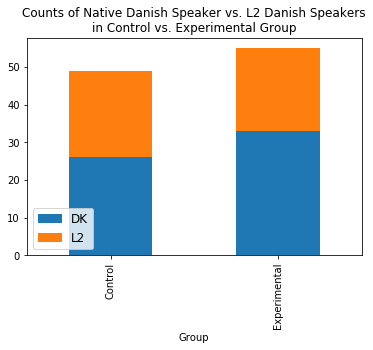

In [104]:
ax = df.groupby(['Group','Danish as'])['Please pick a color'].count()
print (ax.unstack())

ax = ax.unstack().plot.bar(stacked=True, title='Counts of Native Danish Speaker vs. L2 Danish Speakers\nin Control vs. Experimental Group')
ax.legend(loc=3, fontsize=12)

### Calculate Accuracies

In [105]:
results_df = pd.DataFrame(columns=['Question','Control', 'Experimental'])
i = 0
for q, a in q_a.items():
    print(q, a)
    control_correct = len(df_control[df[q] == a])
    experiment_correct = len(df_experiment[df[q] == a])
    control_incorrect = len(df_control[df[q] != a])
    experiment_incorrect = len(df_experiment[df[q] != a])
    #print(control_correct, control_incorrect, (control_correct/len(df_control)))
    #print(experiment_correct,experiment_incorrect, experiment_correct/len(df_experiment))
    print('Control group:\n # correct: %s # incorrect: %s  percent correct: %s' 
          %(control_correct, control_incorrect, (control_correct/len(df_control))))
    print('Experimental group:\n # correct: %s # incorrect: %s  percent correct: %s' 
          %(experiment_correct,experiment_incorrect, experiment_correct/len(df_experiment)))
    results_df.loc[i] = [q, (control_correct/len(df_control)),(experiment_correct/len(df_experiment))]
    i+=1
    
results_df

Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt? Han kunne nemmere holde op med at ryge, når han trænede.
Control group:
 # correct: 42 # incorrect: 7  percent correct: 0.8571428571428571
Experimental group:
 # correct: 45 # incorrect: 10  percent correct: 0.8181818181818182
Hvad sætter Michael pris på ved træningen?  At den foregår sammen med hans venner.
Control group:
 # correct: 34 # incorrect: 15  percent correct: 0.6938775510204082
Experimental group:
 # correct: 39 # incorrect: 16  percent correct: 0.7090909090909091
Hvad synes Michaels kone om hans træning?  Hun bryder sig ikke om det.
Control group:
 # correct: 21 # incorrect: 28  percent correct: 0.42857142857142855
Experimental group:
 # correct: 22 # incorrect: 33  percent correct: 0.4
Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman? I et år.
Control group:
 # correct: 34 # incorrect: 15  percent correct: 0.6938775510204082
Exper

/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python

,Question,Control,Experimental
0,"Da Michael var 38 år, begyndte han at løbe læn...",0.857143,0.818182
1,Hvad sætter Michael pris på ved træningen?,0.693878,0.709091
2,Hvad synes Michaels kone om hans træning?,0.428571,0.400000
3,Hvor lang tid trænede Michael at svømme crawl ...,0.693878,0.745455
4,Hvor var Michaels første ironman?,0.897959,0.909091
5,Hvor gammel er Michael nu?,0.959184,0.909091
6,Hvornår vil Michael stoppe med at løbe?,0.612245,0.600000


### Subject-by-subject Accuracy

#### Mean subject level scores

In [106]:
results_subj_df = pd.DataFrame(columns=['Group', 'Score'])
i = 0
for subj in df.to_dict(orient='records'):
    num_correct = 0
    num_correct = sum([1 for q, a in q_a.items() if a == subj[q]]) 
    score = num_correct/7
    results_subj_df.loc[i] = [subj['Group'], score]
    i+=1
    
results_subj_df.groupby('Group').mean()

,Score
Group,
Control,0.734694
Experimental,0.727273


In [107]:
set(results_subj_df[results_subj_df['Group'] == 'Control']['Score'])

{0.14285714285714285,
 0.2857142857142857,
 0.42857142857142855,
 0.5714285714285714,
 0.7142857142857143,
 0.8571428571428571,
 1.0}

Text(0.5, 1.0, 'Distribution of Individual Subject Scores')

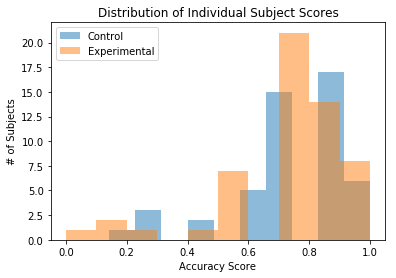

In [108]:
plt.hist(results_subj_df[results_subj_df['Group'] == 'Control']['Score'], bins=10, alpha=0.5)
plt.hist(results_subj_df[results_subj_df['Group'] == 'Experimental']['Score'], bins=10, alpha=0.5)
plt.legend(['Control', 'Experimental'])
plt.ylabel('# of Subjects')
plt.xlabel('Accuracy Score')
plt.title('Distribution of Individual Subject Scores')

## Can we do a t-test?

### Aggregate Accuracy level

levene pvalue 0.9045713466450009 : test is not significant. there is homogeneity of variances and we can proceed.
shapiro pvalue 0.7837358713150024 : test is not significant. the data is indicated to be normally distributed.


(0.9045713466450009, 0.7837358713150024)

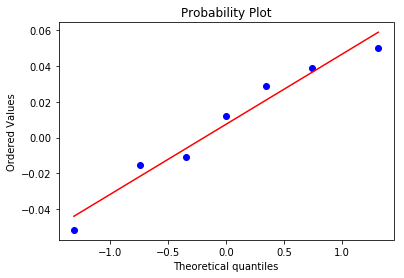

In [109]:
def test_stat_independence(col1, col2):
    levene = stats.levene(col1, col2)
    if levene.pvalue > 0.05:
        print('levene pvalue %s : test is not significant. there is homogeneity of variances and we can proceed.'%(levene.pvalue))
    else:
        print('levene pvalue %s : test is significant. there is NOT homogeneity of variances, so we cannot proceed.'%(levene.pvalue))
        return
    diff = col1 - col2
    stats.probplot(diff, plot= plt)
    shapiro = stats.shapiro(diff)[1]
    if shapiro > 0.05:
        print('shapiro pvalue %s : test is not significant. the data is indicated to be normally distributed.'%(shapiro))
    else:
        print('shapiro pvalue %s : test is significant. the data is NOT indicated to be normally distributed.'%(shapiro))
        return
    return levene.pvalue, shapiro
    
test_stat_independence(results_df['Control'], results_df['Experimental'])

## T-test

In [149]:
def ttest(col1, col2):
    ttest_result= stats.ttest_ind(col1, col2)
    if ttest_result.pvalue < 0.05:
        print('two-sided ttest p-value is less than 0.05: it is not by chance that the sample means are different')
    else:
        print('two-sided ttest p-value is not statistically significant')
    print('independent t-test p-value %s' %(ttest_result.pvalue))
    descriptives, results = rp.ttest(col1, col2)
    print(results)
    one_sided_ttest = results[results['Independent t-test'] == 'Mean of Control < mean of Experimental p value = ']['results'].values
    print(one_sided_ttest)
    if one_sided_ttest < 0.05:
        print('one-sided ttest p-value is less than 0.05: it is not by chance that the sample means are different')
    else:
        print('one-sided ttest p-value is not statistically significant')
    return one_sided_ttest
          

### Aggregate Accuracy Level
#### Control vs. Experimental

In [150]:
ttest(results_df['Control'], results_df['Experimental'])

two-sided ttest p-value is not statistically significant
independent t-test p-value 0.9408161021891395
                                  Independent t-test  results
0             Difference (Control - Experimental) =    0.0074
1                              Degrees of freedom =   12.0000
2                                               t =    0.0758
3                           Two side test p value =    0.9408
4  Mean of Control > mean of Experimental p value =    0.5296
5  Mean of Control < mean of Experimental p value =    0.4704
6                                       Cohen's d =    0.0405
7                                       Hedge's g =    0.0379
8                                   Glass's delta =    0.0402
9                                               r =    0.0219
[0.4704]
one-sided ttest p-value is not statistically significant


array([0.4704])

### Subject Level ttest
#### Control vs. Experimental

levene pvalue 0.8431611029384073 : test is not significant. there is homogeneity of variances and we can proceed.
shapiro pvalue 1.0 : test is not significant. the data is indicated to be normally distributed.
p-value is not statistically significant
independent t-test p-value 0.8569931958775705
                         Independent t-test   results
0             Difference (Score - Score) =     0.0074
1                     Degrees of freedom =   102.0000
2                                      t =     0.1807
3                  Two side test p value =     0.8570
4  Mean of Score > mean of Score p value =     0.5715
5  Mean of Score < mean of Score p value =     0.4285
6                              Cohen's d =     0.0355
7                              Hedge's g =     0.0352
8                          Glass's delta =     0.0367
9                                      r =     0.0179


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Score,49.0,0.734694,0.202031,0.028862,0.676664,0.792724
1,Score,55.0,0.727273,0.215206,0.029018,0.669094,0.785451
2,combined,104.0,0.730769,0.208125,0.020408,0.690294,0.771244


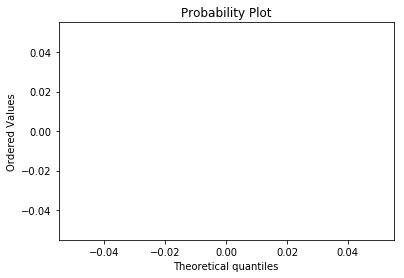

In [112]:
# split subject results into control and experimental
subj_control = results_subj_df[df.Group =='Control']
subj_experimental = results_subj_df[df.Group =='Experimental']
test_stat_independence(subj_control.Score, subj_experimental.Score)
ttest(subj_control.Score, subj_experimental.Score)
# todo: math question, does it make sense that the Aggregate and Subject level tests have the same means? i think it does...
# and does it make sense that they have different std deviations and p-values?

In [113]:
results_lang_df = pd.DataFrame(columns=['Question','Control Danes', 'Experimental Danes', 'Control L2', 'Experimental L2'])
i = 0
for q, a in q_a.items():
    print(q, a)
    dk_control_correct = len(df_control_danes[df[q] == a])
    dk_experiment_correct = len(df_experiment_danes[df[q] == a])
    L2_control_correct = len(df_control_L2[df[q] == a])
    L2_experiment_correct = len(df_experiment_L2[df[q] == a])
    #control_incorrect = len(df_control_danes[df[q] != a])
    #experiment_incorrect = len(df_experiment_danes[df[q] != a])
    #print(control_correct, control_incorrect, (control_correct/len(df_control)))
    #print(experiment_correct,experiment_incorrect, experiment_correct/len(df_experiment))
    #print('Control group:\n # correct: %s # incorrect: %s  percent correct: %s' 
    #      %(control_correct, control_incorrect, (control_correct/len(df_control))))
    #print('Experimental group:\n # correct: %s # incorrect: %s  percent correct: %s' 
    #      %(experiment_correct,experiment_incorrect, experiment_correct/len(df_experiment)))
    results_lang_df.loc[i] = [q, round((dk_control_correct/len(df_control_danes)),3),round((dk_experiment_correct/len(df_experiment_danes)),3),round((L2_control_correct/len(df_control_L2)),3),round((L2_experiment_correct/len(df_experiment_L2)),3)]
    i+=1
    
results_lang_df

Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt? Han kunne nemmere holde op med at ryge, når han trænede.
Hvad sætter Michael pris på ved træningen?  At den foregår sammen med hans venner.
Hvad synes Michaels kone om hans træning?  Hun bryder sig ikke om det.
Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman? I et år.
Hvor var Michaels første ironman? Spanien
Hvor gammel er Michael nu? 48
Hvornår vil Michael stoppe med at løbe? Han vil aldrig stoppe.


/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python

,Question,Control Danes,Experimental Danes,Control L2,Experimental L2
0,"Da Michael var 38 år, begyndte han at løbe læn...",0.923,0.970,0.783,0.591
1,Hvad sætter Michael pris på ved træningen?,0.769,0.667,0.609,0.773
2,Hvad synes Michaels kone om hans træning?,0.346,0.424,0.522,0.364
3,Hvor lang tid trænede Michael at svømme crawl ...,0.692,0.727,0.696,0.773
4,Hvor var Michaels første ironman?,0.885,0.939,0.913,0.864
5,Hvor gammel er Michael nu?,0.923,0.909,1.000,0.909
6,Hvornår vil Michael stoppe med at løbe?,0.538,0.545,0.696,0.682


In [114]:
results_danes_immigrant_df = pd.DataFrame(columns=['Question','Danes', 'Immigrants'])
i = 0
for q, a in q_a.items():
    print(q, a)
    control_correct = len(df_danes[df[q] == a])
    experiment_correct = len(df_L2[df[q] == a])
    control_incorrect = len(df_danes[df[q] != a])
    experiment_incorrect = len(df_L2[df[q] != a])
    #print(control_correct, control_incorrect, (control_correct/len(df_control)))
    #print(experiment_correct,experiment_incorrect, experiment_correct/len(df_experiment))
    print('Control group:\n # correct: %s # incorrect: %s  percent correct: %s' 
          %(control_correct, control_incorrect, (control_correct/len(df_danes))))
    print('Experimental group:\n # correct: %s # incorrect: %s  percent correct: %s' 
          %(experiment_correct,experiment_incorrect, experiment_correct/len(df_L2)))
    results_danes_immigrant_df.loc[i] = [q, (control_correct/len(df_danes)),(experiment_correct/len(df_L2))]
    i+=1
    
results_danes_immigrant_df

Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt? Han kunne nemmere holde op med at ryge, når han trænede.
Control group:
 # correct: 56 # incorrect: 3  percent correct: 0.9491525423728814
Experimental group:
 # correct: 31 # incorrect: 14  percent correct: 0.6888888888888889
Hvad sætter Michael pris på ved træningen?  At den foregår sammen med hans venner.
Control group:
 # correct: 42 # incorrect: 17  percent correct: 0.711864406779661
Experimental group:
 # correct: 31 # incorrect: 14  percent correct: 0.6888888888888889
Hvad synes Michaels kone om hans træning?  Hun bryder sig ikke om det.
Control group:
 # correct: 23 # incorrect: 36  percent correct: 0.3898305084745763
Experimental group:
 # correct: 20 # incorrect: 25  percent correct: 0.4444444444444444
Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman? I et år.
Control group:
 # correct: 42 # incorrect: 17  percent correct: 0.711864406

/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python

,Question,Danes,Immigrants
0,"Da Michael var 38 år, begyndte han at løbe læn...",0.949153,0.688889
1,Hvad sætter Michael pris på ved træningen?,0.711864,0.688889
2,Hvad synes Michaels kone om hans træning?,0.389831,0.444444
3,Hvor lang tid trænede Michael at svømme crawl ...,0.711864,0.733333
4,Hvor var Michaels første ironman?,0.915254,0.888889
5,Hvor gammel er Michael nu?,0.915254,0.955556
6,Hvornår vil Michael stoppe med at løbe?,0.542373,0.688889


levene pvalue 0.42127674565081236 : test is not significant. there is homogeneity of variances and we can proceed.
shapiro pvalue 0.16767804324626923 : test is not significant. the data is indicated to be normally distributed.


(0.42127674565081236, 0.16767804324626923)

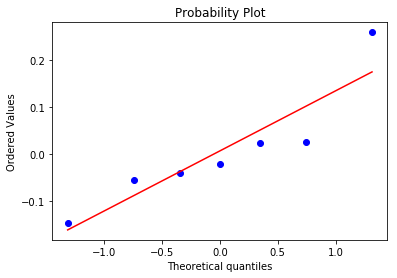

In [115]:
test_stat_independence(results_danes_immigrant_df['Danes'], results_danes_immigrant_df['Immigrants'])

In [116]:
ttest(results_danes_immigrant_df['Danes'], results_danes_immigrant_df['Immigrants'])

p-value is not statistically significant
independent t-test p-value 0.9485609276399194
                              Independent t-test  results
0             Difference (Danes - Immigrants) =    0.0067
1                          Degrees of freedom =   12.0000
2                                           t =    0.0659
3                       Two side test p value =    0.9486
4  Mean of Danes > mean of Immigrants p value =    0.5257
5  Mean of Danes < mean of Immigrants p value =    0.4743
6                                   Cohen's d =    0.0352
7                                   Hedge's g =    0.0330
8                               Glass's delta =    0.0316
9                                           r =    0.0190


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Danes,7.0,0.733656,0.211404,0.079903,0.538140,0.929172
1,Immigrants,7.0,0.726984,0.164662,0.062236,0.574697,0.879271
2,combined,14.0,0.730320,0.182079,0.048663,0.625191,0.835449


In [117]:
with open('results.tex','w') as rf:
    rf.write(results_df.to_latex(index=False))